In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Application 

In [3]:
df_app = pd.read_excel(r"data\application.xlsx",header = 1)

In [4]:
df_app.head(5)

,Postcode,April Application Count,May Application Count
0,0800,413,429
1,0801,15,15
2,0810,773,787
3,0812,316,325
4,0820,740,754


In [5]:
df_app.dtypes

Postcode                   object
April Application Count     int64
May Application Count       int64
dtype: object

In [6]:
df_app.drop(index=[2538,2539],inplace=True)

In [7]:
df_app['Postcode'] = df_app['Postcode'].astype('int64')

In [8]:
def state_cvt(code):
    if code in range(1000,2000) or code in range(2000,2600) or code in range(2619,2890) or code in range(2921,3000):
        return 'NSW'
    elif code in range(200,300) or code in range(2600,2619) or code in range(2900,2921):
        return 'ACT'
    elif code in range(3000,4000) or code in range(8000,9000):
        return 'VIC'
    elif code in range(4000,5000) or code in range(9000,10000):
        return 'QLD'
    elif code in range(5000,5800) or code in range(5800,6000):
        return 'SA'
    elif code in range(6000,6798) or code in range(6800,7000):
        return 'WA'
    elif code in range(7000,7800) or code in range(7800,8000):
        return 'TAS'
    elif code in range(800,1000):
        return 'NT'
    else:
        return np.NaN

In [9]:
df_app['State'] = df_app['Postcode'].apply(state_cvt)

In [10]:
dfa = df_app.groupby('State').sum().drop(columns='Postcode')
dfa

,April Application Count,May Application Count
State,,
ACT,9323,9642
NSW,300304,315273
NT,4615,4762
QLD,163487,172400
SA,50760,54087
TAS,14266,15017
VIC,235631,248550
WA,80886,85428


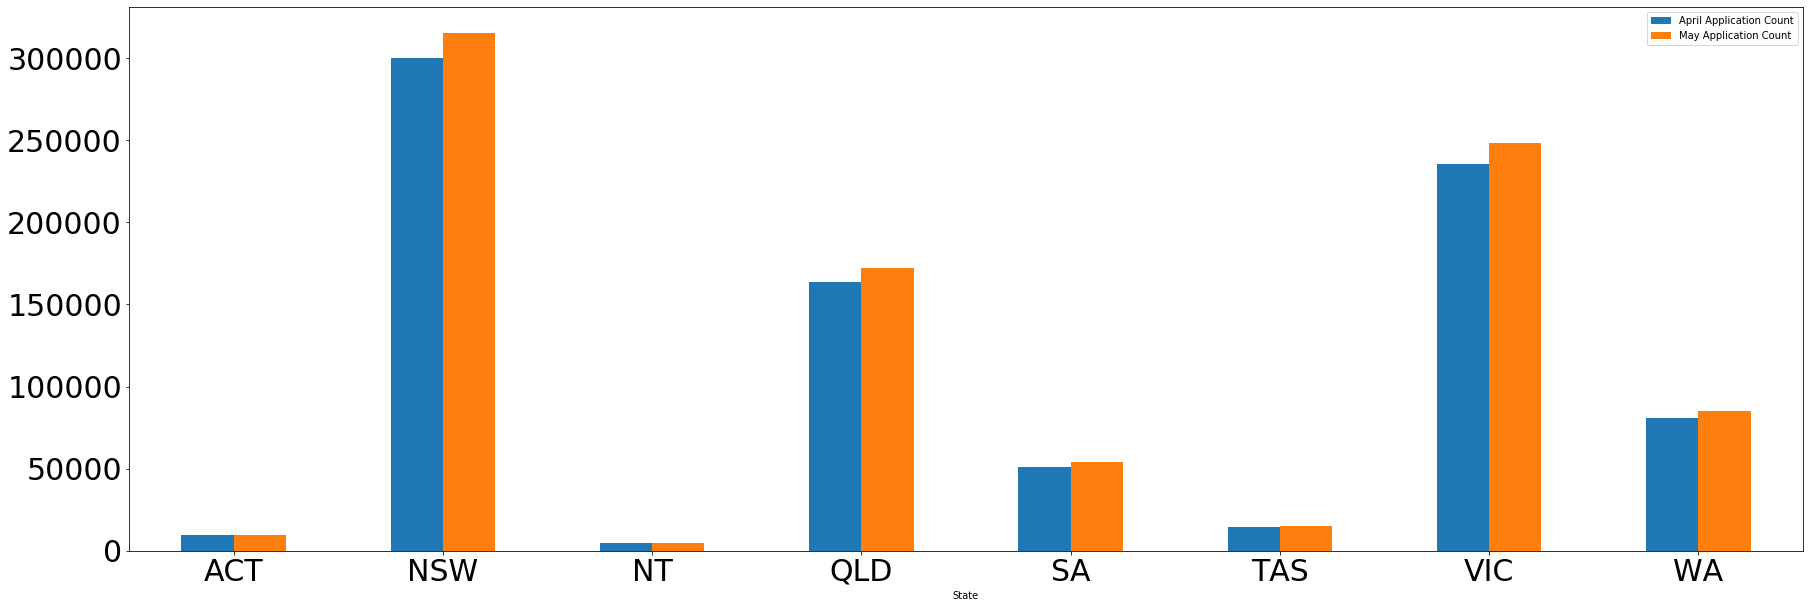

In [11]:
dfa.plot(kind='bar',figsize=(30,10),rot = 0,fontsize=30)

# Current employment situation

In [14]:
df = pd.read_excel(r"data\CurrentSituation.xlsx")

In [15]:
df

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
0,Capital Region,NSW/ACT,"Agriculture, Forestry and Fishing",4400,2500,1800,2700,1600,-3100,1.3
1,Capital Region,NSW/ACT,Mining,500,500,0,500,0,-400,0.1
2,Capital Region,NSW/ACT,Manufacturing,7700,6900,800,5700,2100,-5000,2.2
3,Capital Region,NSW/ACT,"Electricity, Gas, Water and Waste Services",3300,2400,900,3000,200,-1000,0.9
4,Capital Region,NSW/ACT,Construction,31000,27600,3400,27100,3800,3100,8.9
...,...,...,...,...,...,...,...,...,...,...
869,Australia,NaN,Public Administration and Safety,884300,698600,144600,428500,414800,149200,7.0
870,Australia,NaN,Education and Training,1084800,671700,411500,312000,771200,144400,8.6
871,Australia,NaN,Health Care and Social Assistance,1765000,963600,805500,393800,1375200,249400,14.0
872,Australia,NaN,Arts and Recreation Services,212000,118100,99000,110200,106900,-8700,1.7


In [16]:
df.columns

Index(['Employment Region', 'State/Territory', 'Industry',
       'Employment by Industry - Total', 'Employed Full-Time',
       'Employed Part-Time', 'Employed - Male', 'Employed - Female',
       'Five year growth by Industry', 'Employment Distribution (%)'],
      dtype='object')

In [17]:
df.dropna(inplace=True)

In [18]:
df = df.iloc[:,1:4]
df

,State/Territory,Industry,Employment by Industry - Total
0,NSW/ACT,"Agriculture, Forestry and Fishing",4400
1,NSW/ACT,Mining,500
2,NSW/ACT,Manufacturing,7700
3,NSW/ACT,"Electricity, Gas, Water and Waste Services",3300
4,NSW/ACT,Construction,31000
...,...,...,...
850,NT,Public Administration and Safety,13800
851,NT,Education and Training,7000
852,NT,Health Care and Social Assistance,12000
853,NT,Arts and Recreation Services,1500


In [19]:
total_emp = pd.pivot_table(df,values='Employment by Industry - Total',columns='Industry',index='State/Territory',
              aggfunc=np.sum)
total_emp.index.name = None
total_emp

Industry,Accommodation and Food Services,Administrative and Support Services,"Agriculture, Forestry and Fishing",Arts and Recreation Services,Construction,Education and Training,"Electricity, Gas, Water and Waste Services",Financial and Insurance Services,Health Care and Social Assistance,Information Media and Telecommunications,Manufacturing,Mining,Other Services,"Professional, Scientific and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade
NSW,242200,126500,73600,61700,349600,305500,36700,210700,511500,78900,240100,35900,128800,397700,206700,61900,373400,195400,120400
NSW/ACT,25300,9800,4400,5100,31000,30800,3300,4500,38500,5000,7700,500,12200,33300,91500,2900,28000,9700,5000
NT,5300,2500,800,1500,7000,7000,1200,1100,12000,1000,2900,1900,4000,5500,13800,1400,7300,4400,1700
QLD,181700,80300,71500,43700,236800,217200,29700,63300,351800,26700,161500,60600,98500,191900,158700,51700,227900,124400,71800
SA,58800,34300,25500,12000,72000,74400,12200,21500,131900,14200,74700,8200,32100,55700,59200,11600,87900,35000,27900
TAS,20800,6500,17000,4700,19400,24400,3700,5300,39300,3300,18200,2200,8700,15500,19600,3100,25500,10500,5500
VIC,184400,111800,90400,63200,312300,291900,42700,140000,477100,55200,288600,8100,113900,318900,175000,54500,333300,176600,113300
WA,78600,37800,31800,20600,114800,101100,20200,28100,156800,13300,73200,93200,53500,104700,82600,24300,109500,57100,36600


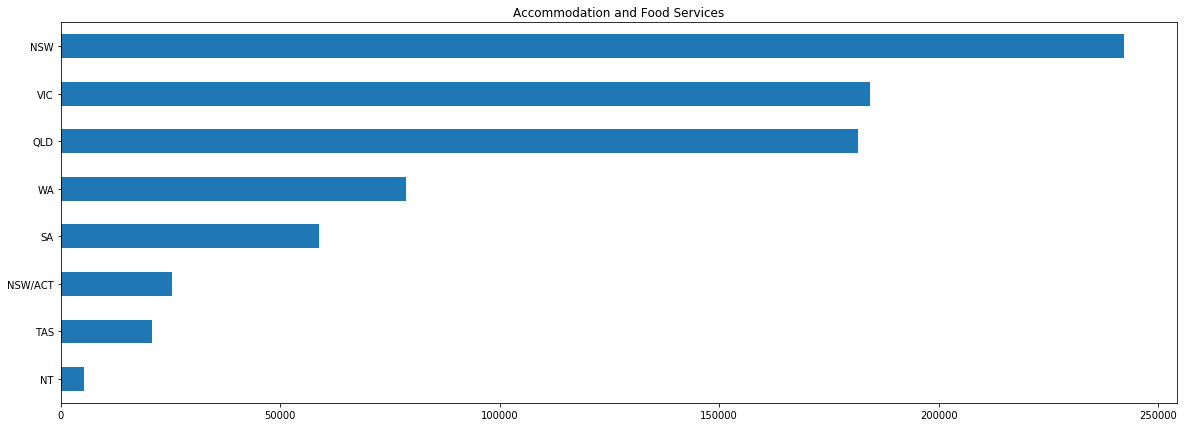

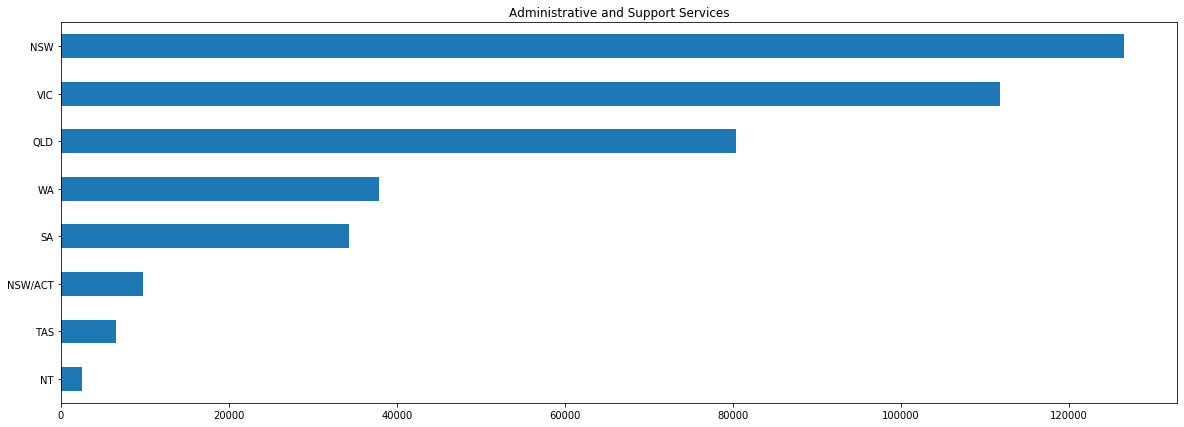

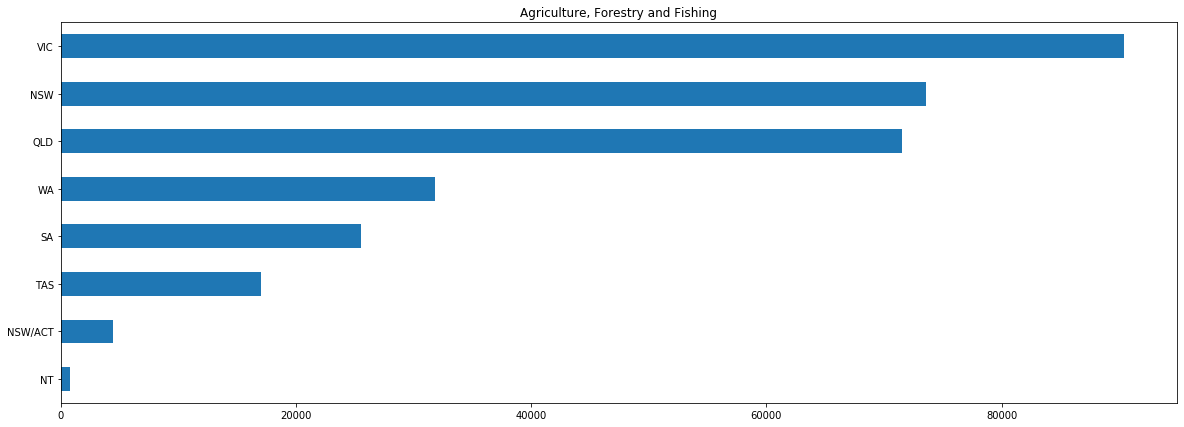

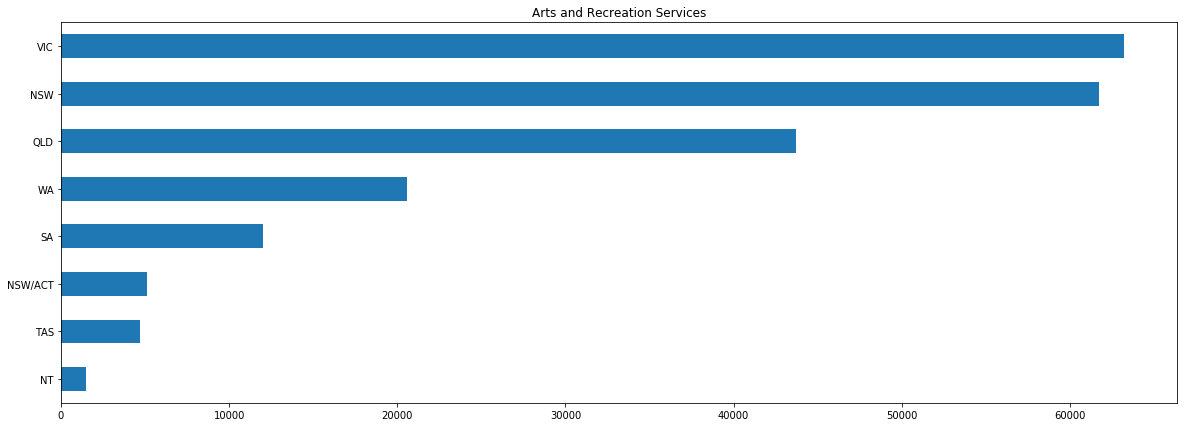

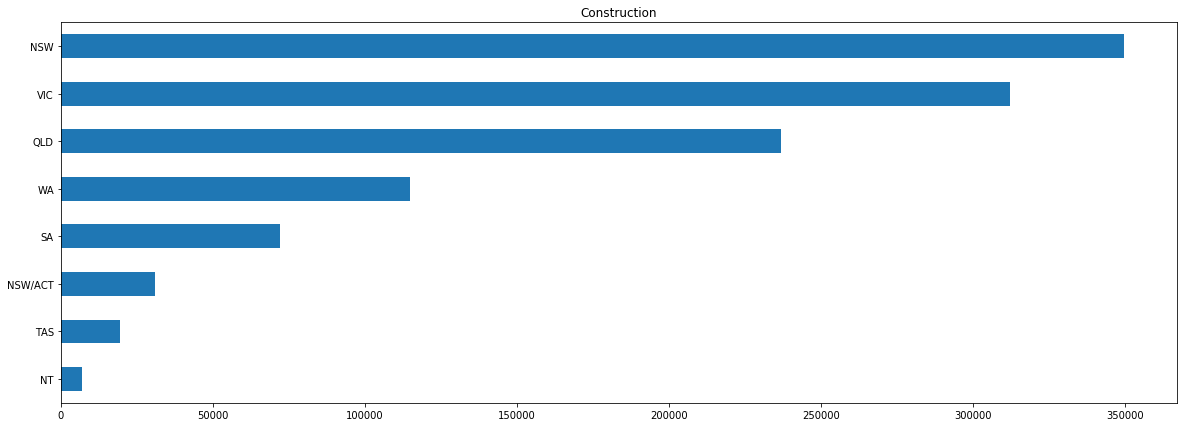

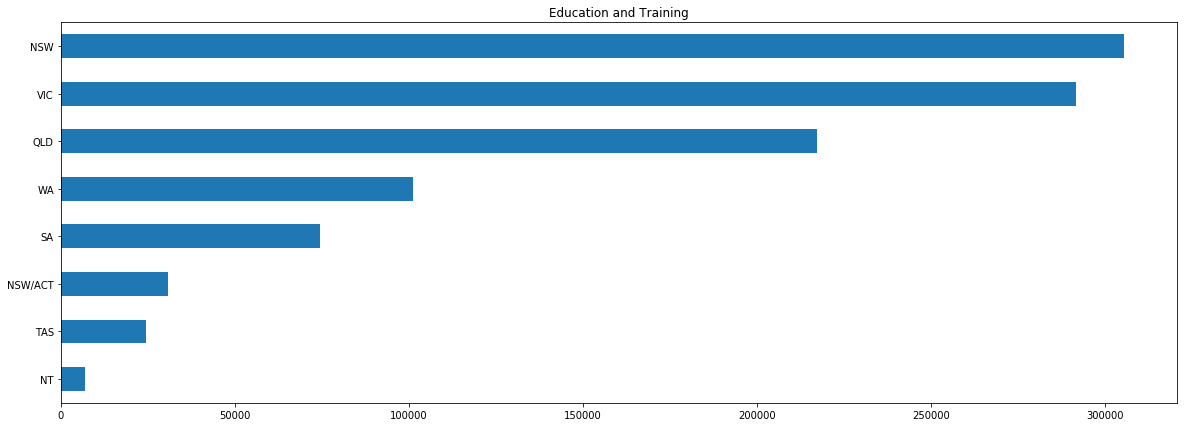

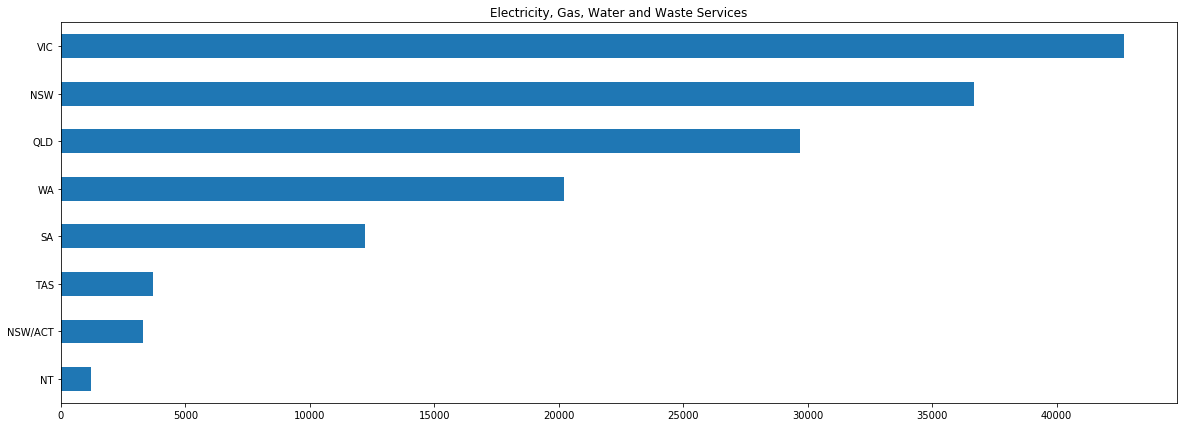

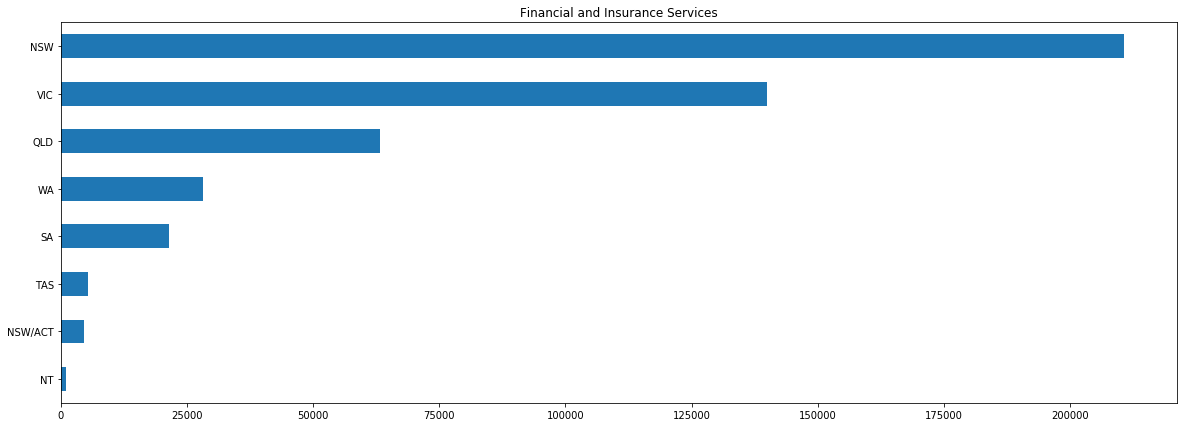

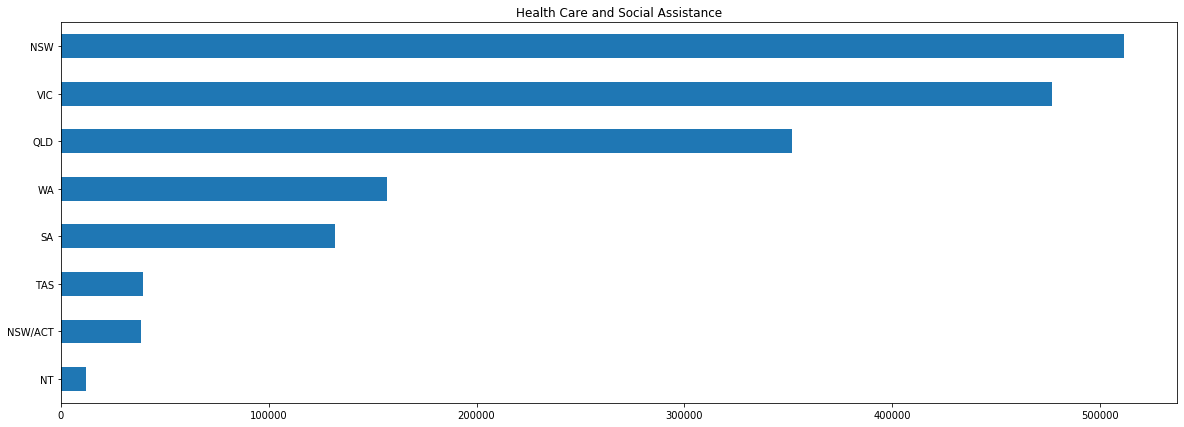

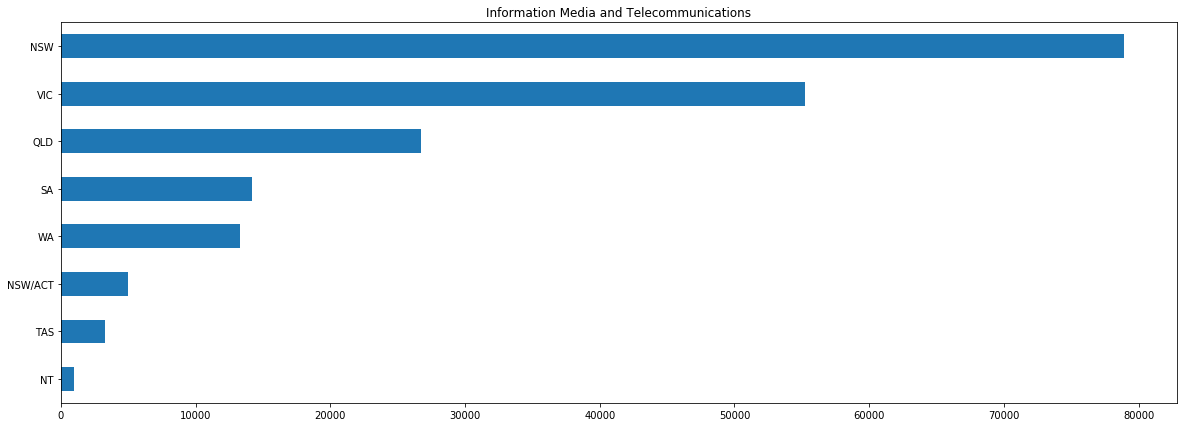

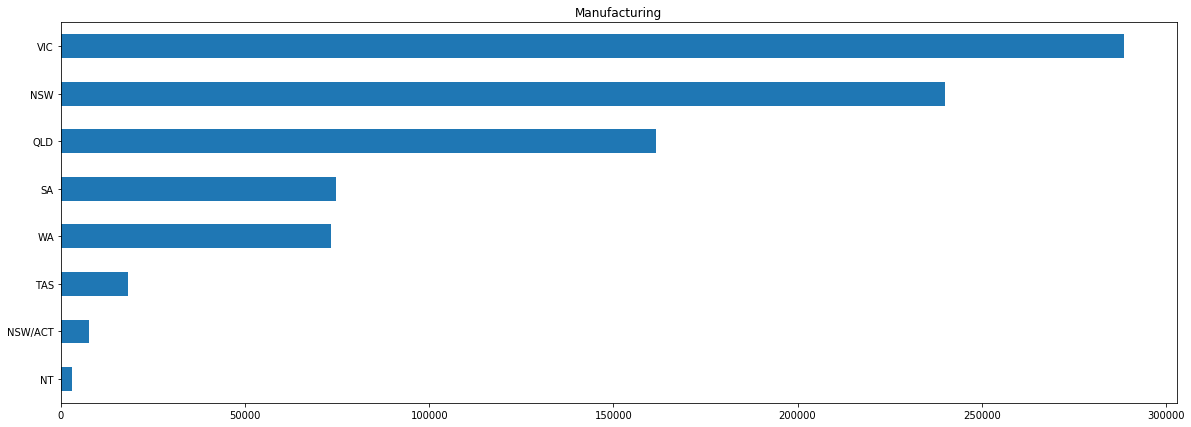

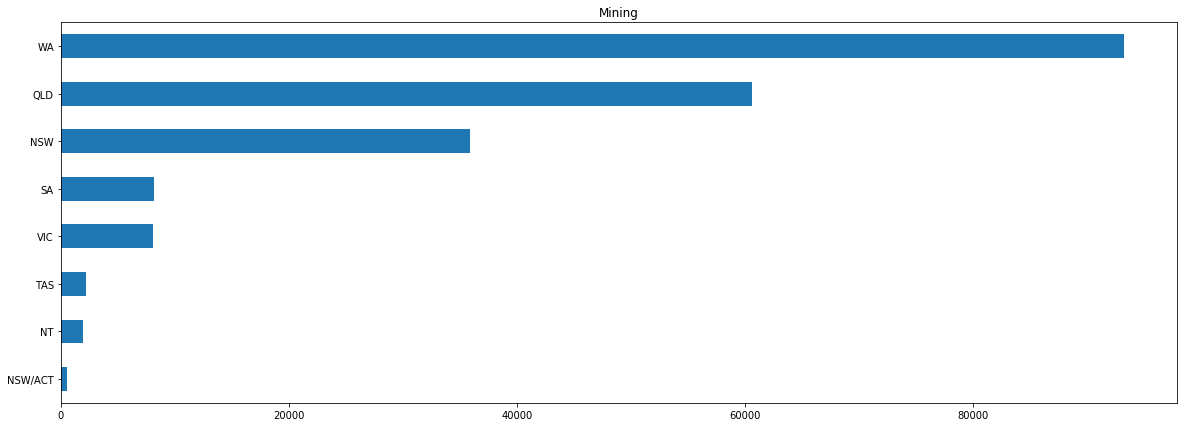

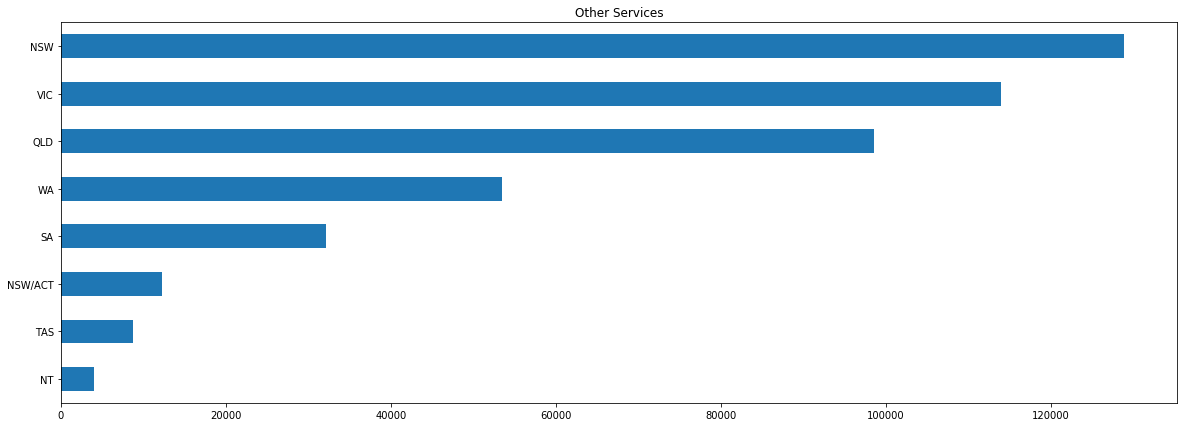

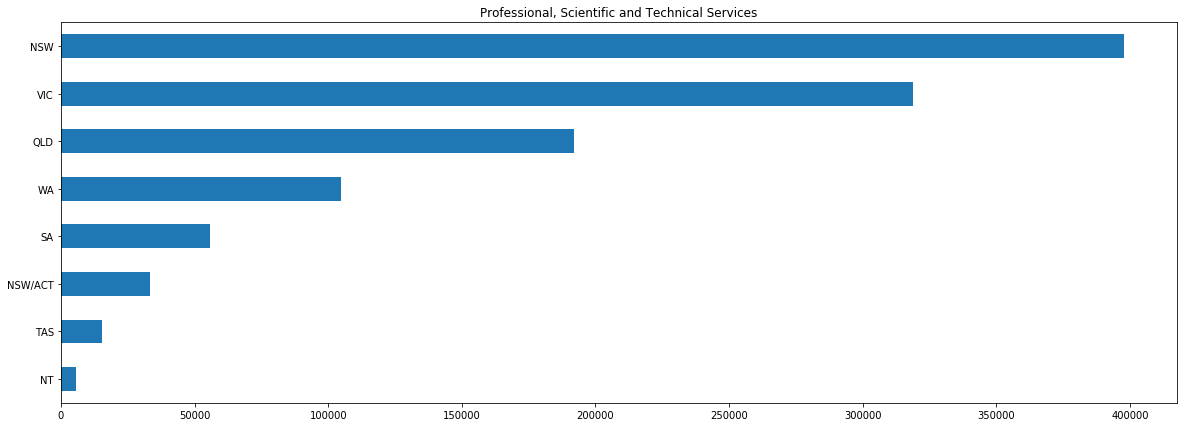

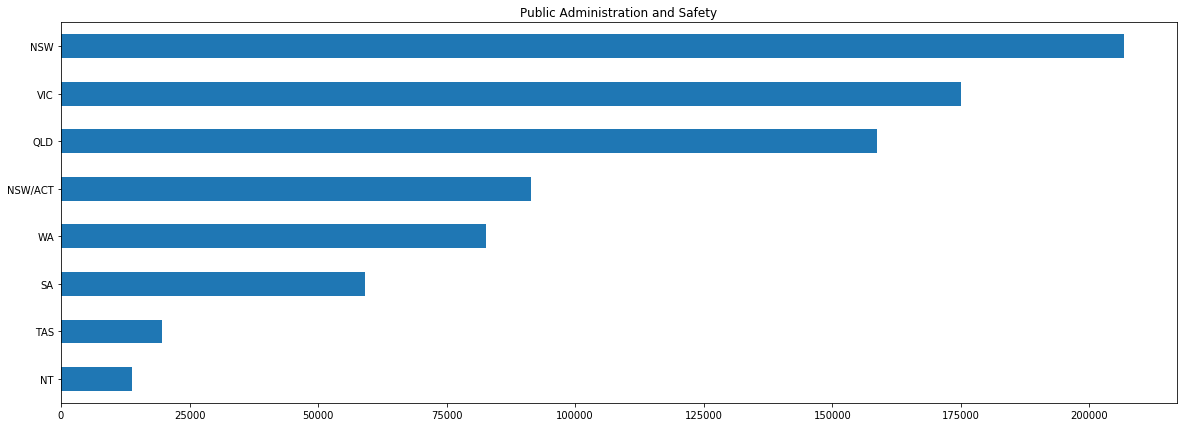

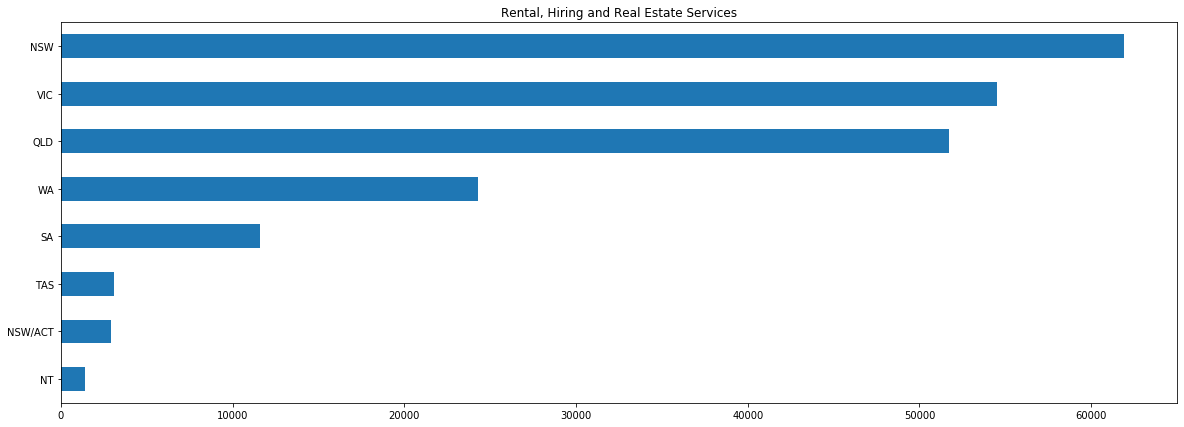

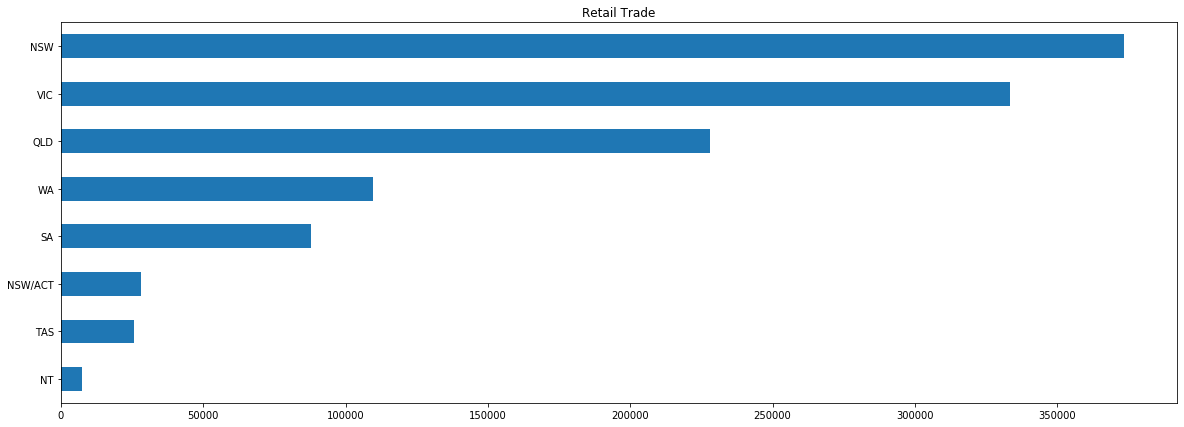

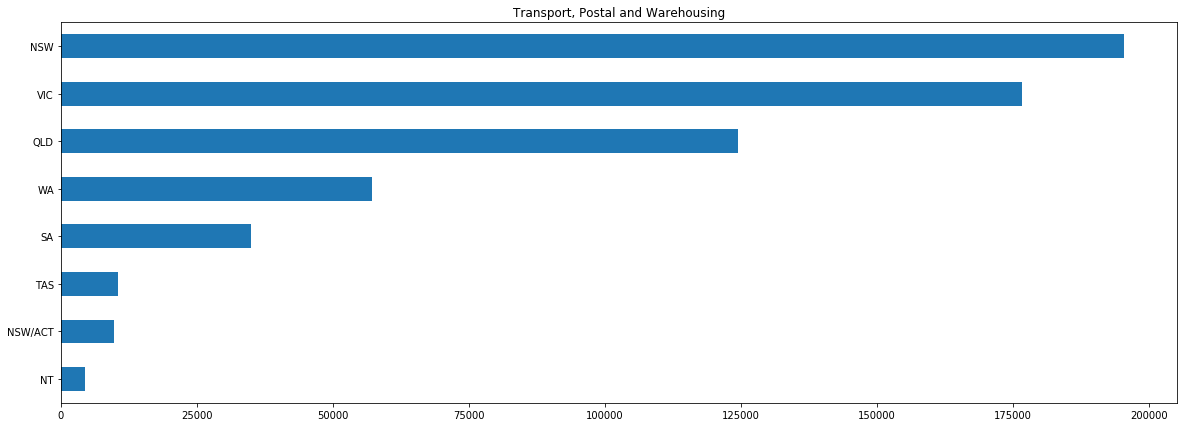

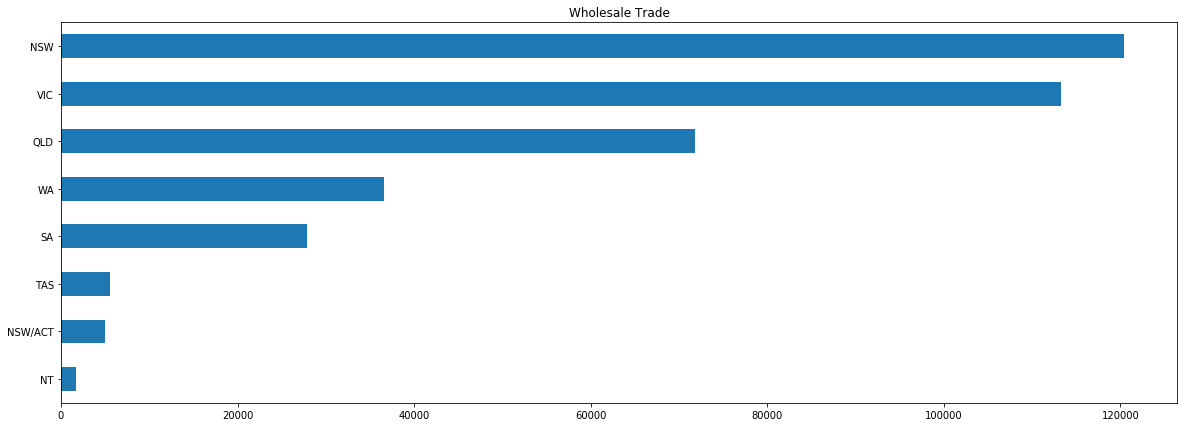

In [20]:
for industry in total_emp.columns:
    plt.figure(figsize=(20,7))
    total_emp[industry].sort_values(ascending=True).plot(kind='barh',title = industry)

In [21]:
total_emp.shape

(8, 19)